In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import shap
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug200csv/drug200.csv


In [2]:
url='/kaggle/input/drug200csv/drug200.csv'
df=pd.read_csv(url,sep=',')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.shape

(200, 6)

In [5]:
cat=df.select_dtypes(include='object').columns
num=df.select_dtypes(include='number').columns

In [6]:
df_num=df[num]
describeNum=df_num.describe()
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Age,200.000000,44.315000,16.544315,15.000000,31.000000,45.000000,58.000000,74.000000
Na_to_K,200.000000,16.084485,7.223956,6.269000,10.445500,13.936500,19.380000,38.247000


<Axes: >

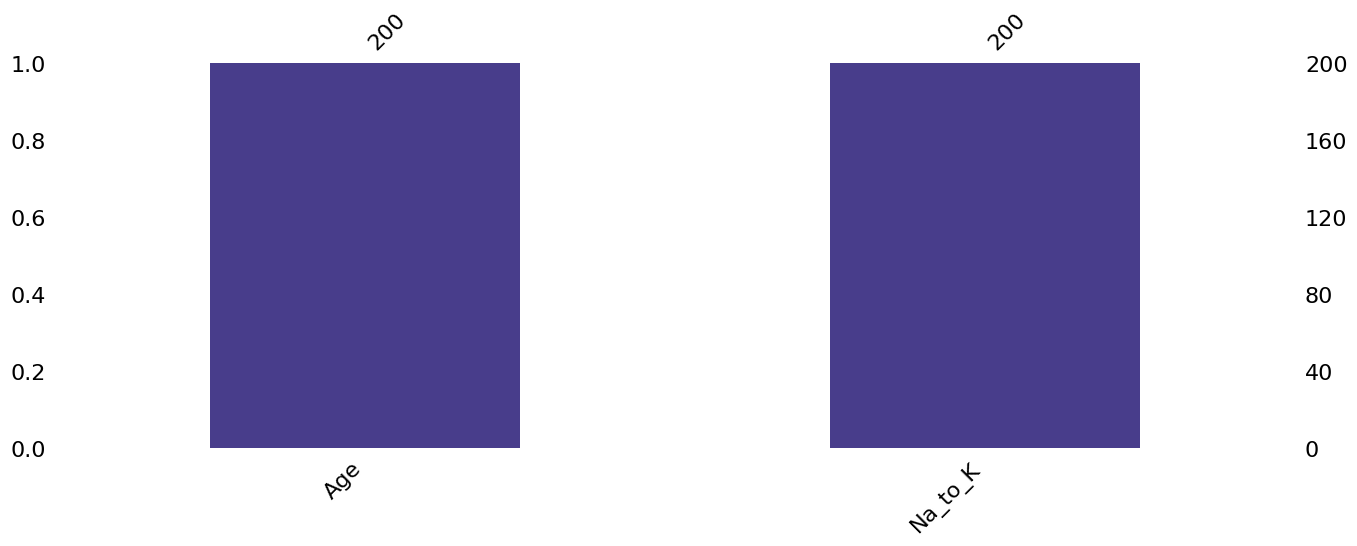

In [7]:
msno.bar(df_num,figsize = (16,5),color = "#483D8B")

In [8]:
df_cat=df[cat]
describeCat=df_cat.describe()
describeCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,drugY,91


<Axes: >

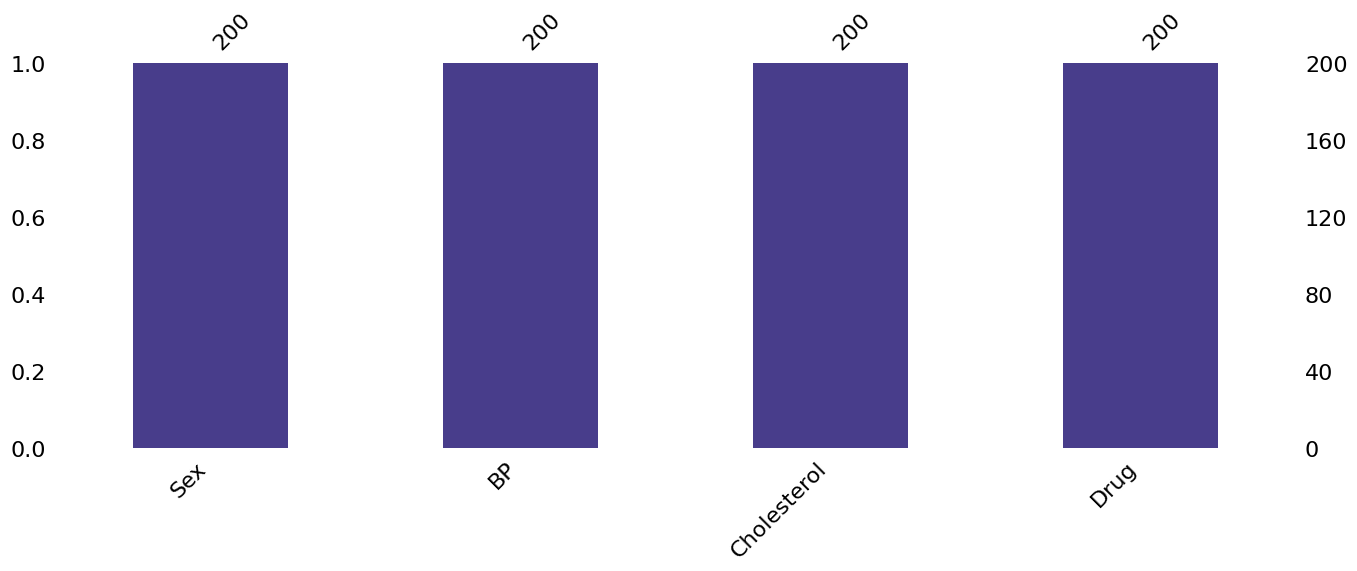

In [9]:
msno.bar(df_cat,figsize = (16,5),color = "#483D8B")

## **EDA**

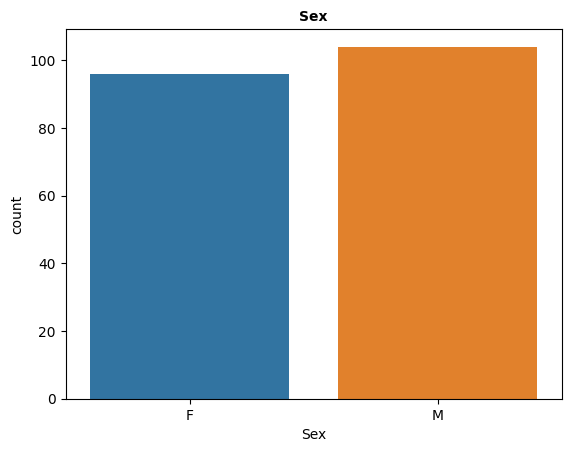

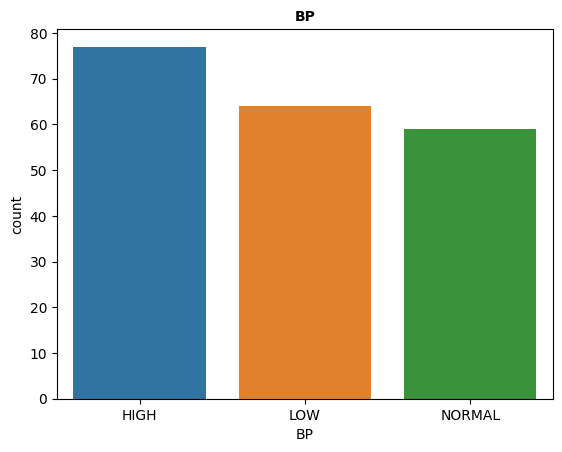

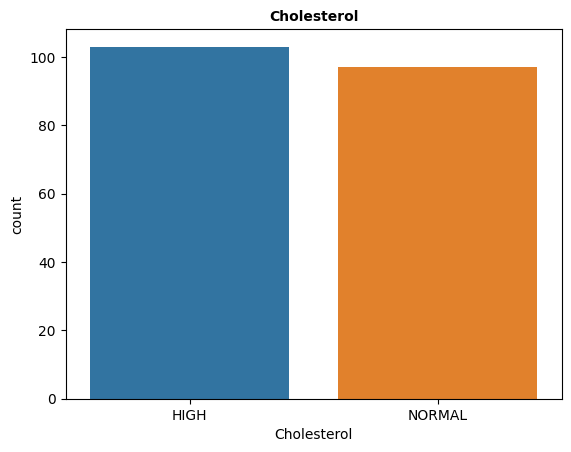

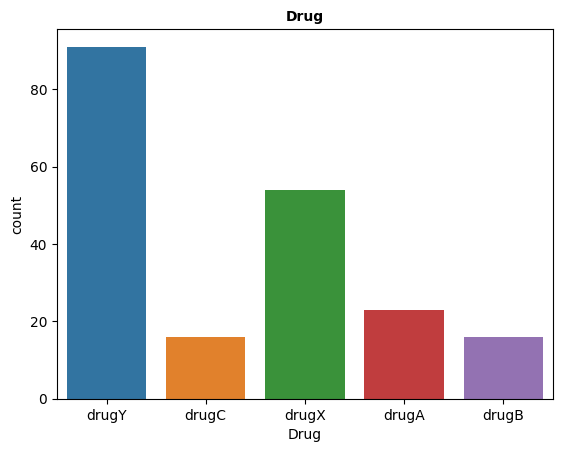

In [10]:
for i in df_cat.columns:
    sns.countplot(data=df_cat,x=i)
    plt.title(i,fontsize=10,weight='bold')
    plt.show()

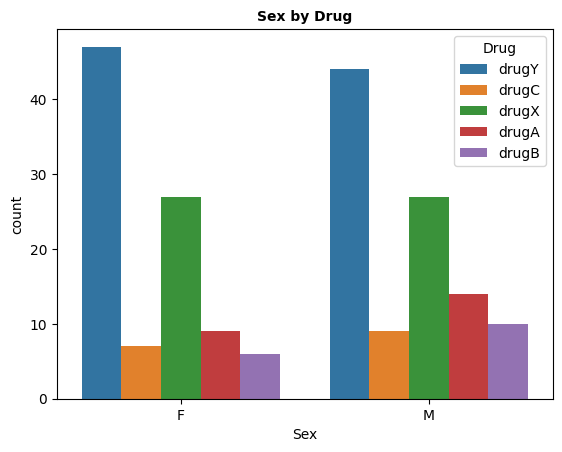

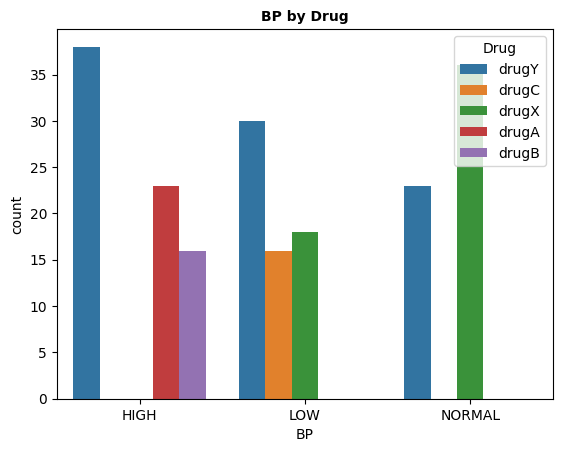

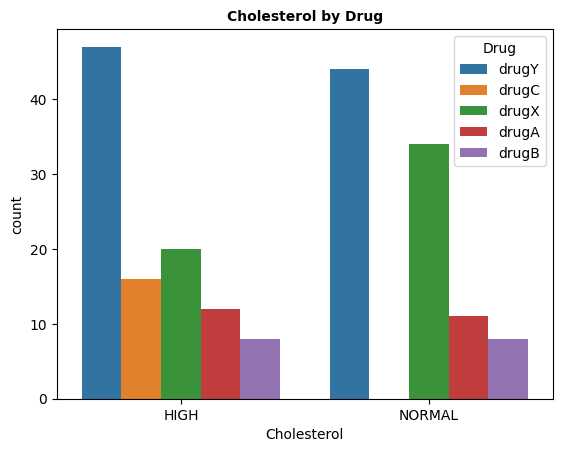

In [11]:
col=['Sex', 'BP', 'Cholesterol']
for i in col:
    sns.countplot(data=df_cat,x=i,hue='Drug')
    plt.title(f'{i} by Drug',fontsize=10,weight='bold')
    plt.show()


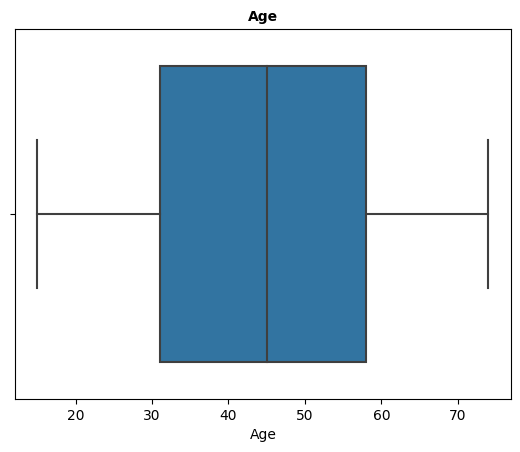

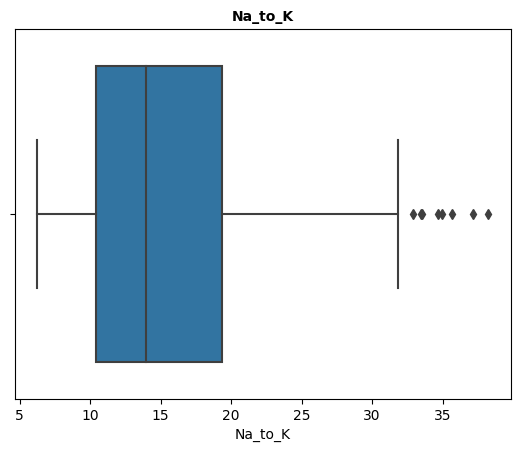

In [12]:
for i in df_num.columns:  
    sns.boxplot(data=df_num,x=i)
    plt.title(i,fontsize=10,weight='bold')
    plt.show()

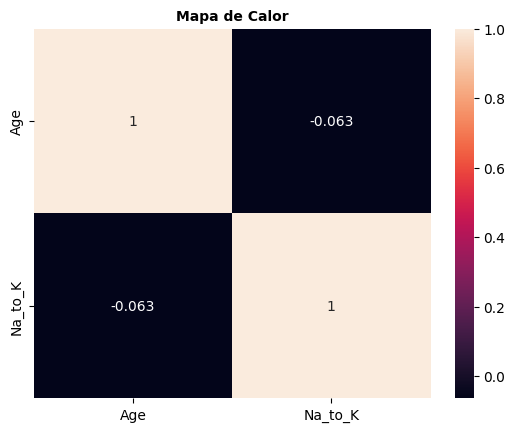

In [13]:
sns.heatmap(df_num.corr(),annot=True)
plt.title('Mapa de Calor',fontsize=10,weight='bold')
plt.show()

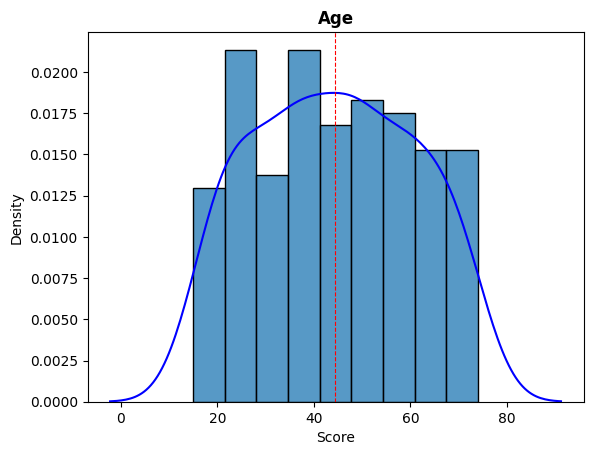

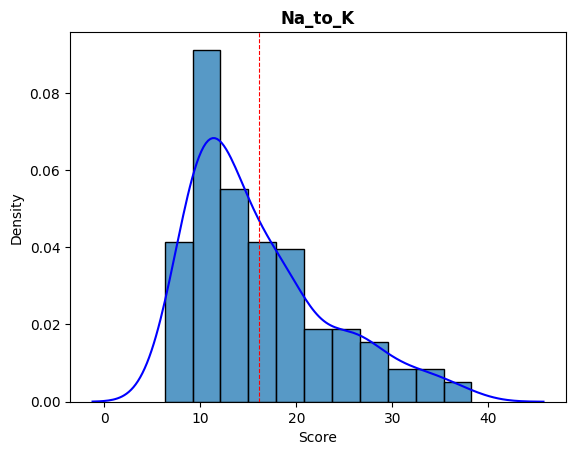

In [14]:
for i in df_num.columns:
  sns.histplot(df_num[i],stat='density')
  sns.kdeplot(df_num[i], color='blue')
  plt.axvline(df_num[i].mean(), color='red', linestyle='--', linewidth=0.8)
  plt.title(i,fontsize=12,weight='bold')
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

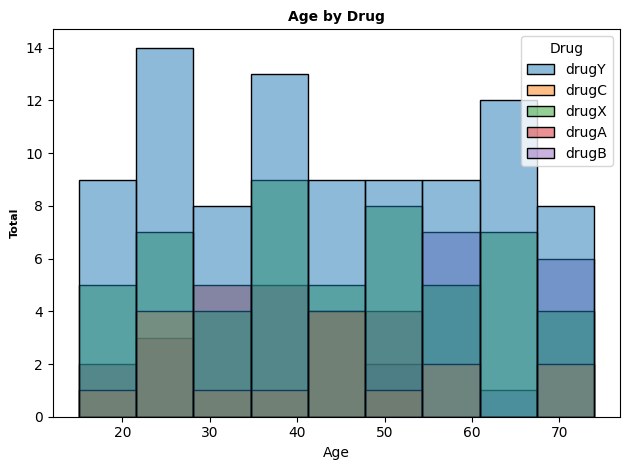

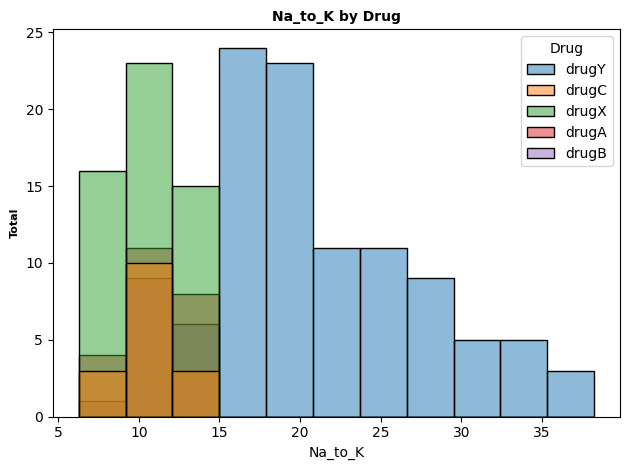

In [15]:
sns.histplot(data=df,x='Age',hue='Drug')
plt.title('Age by Drug',fontsize=10,weight='bold')
plt.ylabel('Total',fontsize=8,weight='bold')
plt.tight_layout()
plt.show()

sns.histplot(data=df,x='Na_to_K',hue='Drug')
plt.title('Na_to_K by Drug',fontsize=10,weight='bold')
plt.ylabel('Total',fontsize=8,weight='bold')
plt.tight_layout()
plt.show()


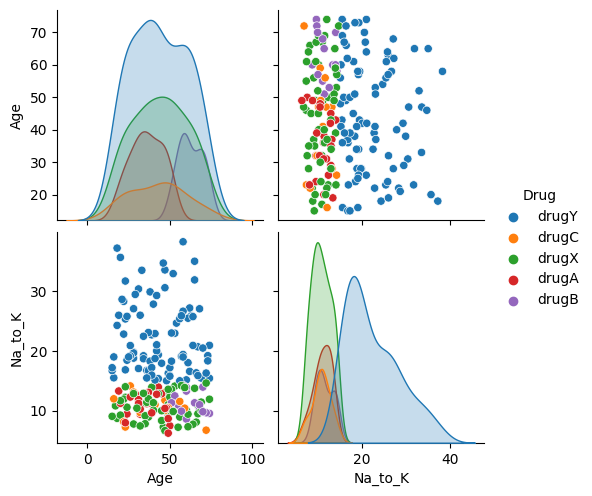

In [16]:
sns.pairplot(df,hue='Drug')

## **Data Preparing**

In [17]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [18]:
df['Sex']=df['Sex'].replace({'M': 0, 'F': 1})
df['Sex'].value_counts()

Sex
0    104
1     96
Name: count, dtype: int64

In [19]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [20]:
df['BP']=df['BP'].replace({'HIGH':0,'NORMAL':1,'LOW':2})
df['BP'].value_counts()

BP
0    77
2    64
1    59
Name: count, dtype: int64

In [21]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [22]:
df['Cholesterol']=df['Cholesterol'].replace({'HIGH':0,'NORMAL':1})
df['Cholesterol'].value_counts()

Cholesterol
0    103
1     97
Name: count, dtype: int64

In [23]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [24]:
df['Drug']=df['Drug'].replace({'drugY':4,'drugX':3,'drugA':2,'drugC':1,'drugB':0})
df['Drug'].value_counts()

Drug
4    91
3    54
2    23
1    16
0    16
Name: count, dtype: int64

In [25]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,0,25.355,4
1,47,0,2,0,13.093,1
2,47,0,2,0,10.114,1
3,28,1,1,0,7.798,3
4,61,1,2,0,18.043,4


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


## **Modelos de Machine Learning**

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,jaccard_score,log_loss

In [32]:
X=df.drop(['Drug'],axis=1)
y=df['Drug'].values

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25,random_state=100)

In [41]:
models = [RandomForestClassifier(), DecisionTreeClassifier(),KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        27

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

------------------------------ 

model: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        27

    accuracy                           1.00        50
   macro avg       1.00      1.00 

## **Hiperparametros**

**DecisionTreeClassifier**

In [54]:
dtc=DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[1,2,3,4,5,6,7],
    'min_samples_leaf':[1,2,3,4,5,6,7],
    'max_features':['auto', 'sqrt', 'log2'],
    'random_state':[25,50,75,100,120]
}
grid_search=GridSearchCV(dtc,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 50, 'splitter': 'best'}


In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',max_depth=6, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=50, splitter='best')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=50)

In [63]:
y_pred=dtc.predict(X_test)
print('Acurracy Score', round(accuracy_score(y_test,y_pred)*100,2), "%")
print('F-1 Score: ',(f1_score(y_test,y_pred,average='micro')))
print('Precision Score: ',(precision_score(y_test,y_pred,average='micro')))
print('Recall Score: ',(recall_score(y_test,y_pred,average='micro')))
print('Jaccard Score: ', (jaccard_score(y_test,y_pred,average='micro')))

Acurracy Score 100.0 %
F-1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
Jaccard Score:  1.0


In [64]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":dtc.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)
fi.head(10)

,Feature Name,Importance
4,Na_to_K,0.464121
2,BP,0.280707
0,Age,0.140095
3,Cholesterol,0.115077
1,Sex,0.000000


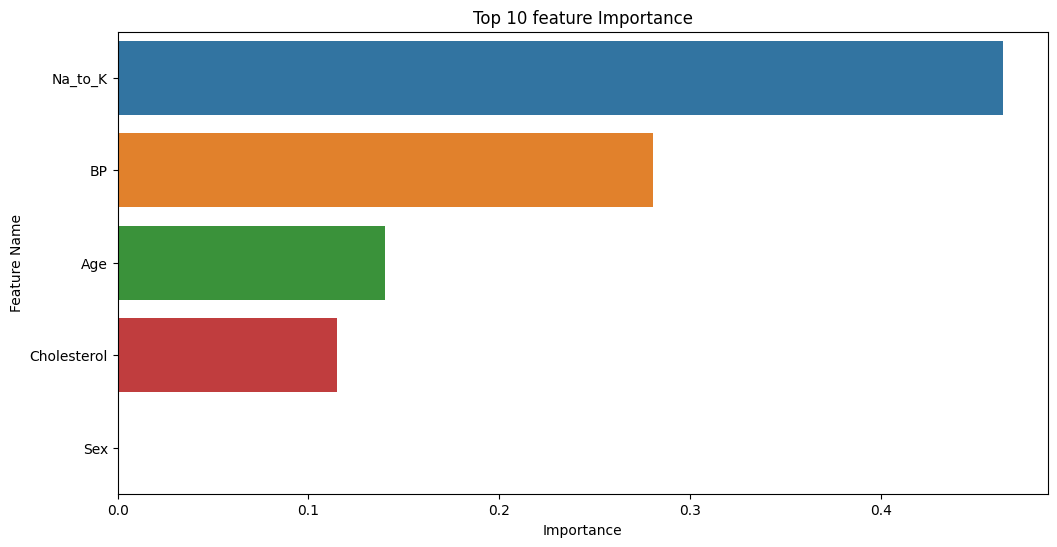

In [65]:
fi_2=fi.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=fi_2,x='Importance',y='Feature Name')
plt.title('Top 10 feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

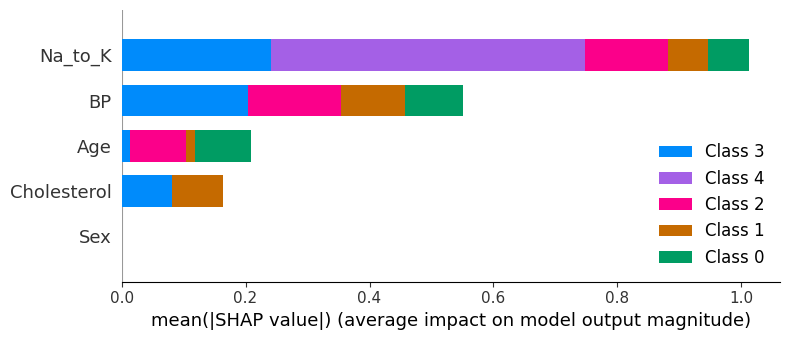

In [66]:
def modelo(model):
  explainer=shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test)
  shap.summary_plot(shap_values,X_test)

modelo(dtc)

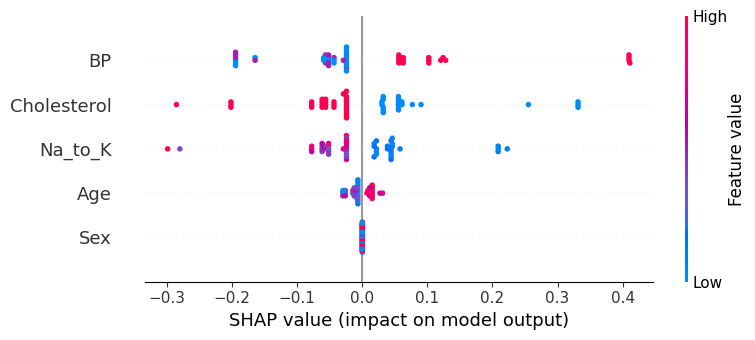

In [67]:
def modelo_shap(model):
  explainer=shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test)
  shap.summary_plot(shap_values[1],X_test.values,feature_names=X_test.columns)
modelo_shap(dtc)

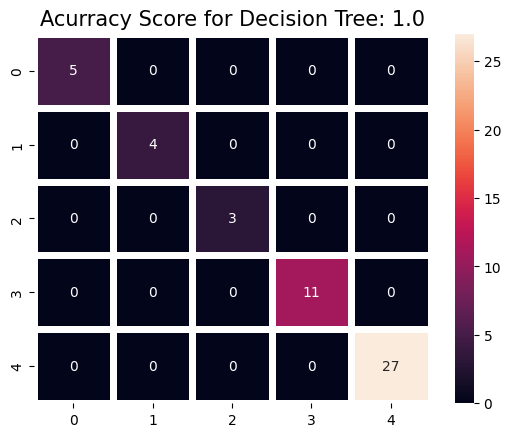

In [68]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Decision Tree: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(dtc)

In [70]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Calcular la precisión en los conjuntos de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("Precisión en el conjunto de prueba:", accuracy_test)

if accuracy_train > accuracy_test:
    print("El modelo podría estar sobreajustado.")
else:
    print("El modelo generaliza bien.")

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 1.0
El modelo generaliza bien.
